In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
#open dataset
a=pd.read_csv(r"F:\python task\ML DATASETS\diabetes.csv")
#descriptive statistics 
a.describe().T



count        mean         std     min       25%  \
Pregnancies               768.0    3.845052    3.369578   0.000   1.00000   
Glucose                   768.0  120.894531   31.972618   0.000  99.00000   
BloodPressure             768.0   69.105469   19.355807   0.000  62.00000   
SkinThickness             768.0   20.536458   15.952218   0.000   0.00000   
Insulin                   768.0   79.799479  115.244002   0.000   0.00000   
BMI                       768.0   31.992578    7.884160   0.000  27.30000   
DiabetesPedigreeFunction  768.0    0.471876    0.331329   0.078   0.24375   
Age                       768.0   33.240885   11.760232  21.000  24.00000   
Outcome                   768.0    0.348958    0.476951   0.000   0.00000   

                               50%        75%     max  
Pregnancies                 3.0000    6.00000   17.00  
Glucose                   117.0000  140.25000  199.00  
BloodPressure              72.0000   80.00000  122.00  
SkinThickness              23.0000   32.00000   99.00  
Insulin                    30.5000  127.25000  846.00  
BMI                        32.0000   36.60000   67.10  
DiabetesPedigreeFunction    0.3725    0.62625    2.42  
Age                        29.0000   41.00000   81.00  
Outcome                     0.0000    1.00000    1.00

In [4]:
#check the nullvalues in dataset
a.isnull().sum()
#check the info
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


C:\Users\Lenovo\Anaconda3\New folder\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


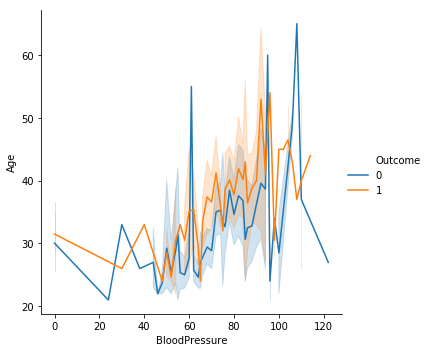

In [5]:
#relation between the blood pressure and age

sns.relplot(x='BloodPressure',y='Age',data=a,kind='line',hue='Outcome')

In [12]:
x=a[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']]
y=a[['Outcome']]
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=101,test_size=0.4)


In [31]:
from sklearn.linear_model import LogisticRegression
b=LogisticRegression()
b.fit(x_train,y_train)
c=b.predict(x_test)


C:\Users\Lenovo\Anaconda3\New folder\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Lenovo\Anaconda3\New folder\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [62]:

pd.DataFrame(c)

0
0    0
1    1
2    0
3    0
4    0
5    1
6    1
7    0
8    0
9    0
10   0
11   0
12   0
13   0
14   0
15   1
16   1
17   0
18   0
19   0
20   0
21   0
22   1
23   0
24   0
25   1
26   0
27   1
28   0
29   0
..  ..
278  1
279  1
280  0
281  0
282  0
283  0
284  1
285  1
286  0
287  0
288  0
289  1
290  1
291  0
292  0
293  0
294  0
295  0
296  0
297  1
298  1
299  0
300  1
301  0
302  0
303  1
304  1
305  0
306  1
307  0

[308 rows x 1 columns]

In [67]:
from sklearn.metrics import confusion_matrix,classification_report
e=classification_report(c,y_test)
f=confusion_matrix(y_test,c)
e


'              precision    recall  f1-score   support\n\n           0       0.86      0.81      0.83       214\n           1       0.61      0.69      0.65        94\n\n   micro avg       0.77      0.77      0.77       308\n   macro avg       0.73      0.75      0.74       308\nweighted avg       0.78      0.77      0.78       308\n'